In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as statsx
from sklearn.linear_model import LinearRegression

In [57]:
def linear_model(x, coef):
    intercept, slope = coef
    return intercept + slope * x

def quadratic_model(x, coef):
    intercept, (slope1, slope2) = coef
    return intercept + slope1 * x + slope2 * x**2

In [81]:
def models_fit_and_errors(n_train, n_test):

    x = pd.read_csv("x_values_0_5_n300.csv", index_col=0)
    x_values = x.values.flatten()
    y = pd.read_csv("y_quad_values_beta1_1_beta2_0.16_n300_x_0_5_vareps_1.csv", index_col=0)
    y_values = y.values.flatten()
    x_train = x_values[:n_train]
    x_test = x_values[n_train:n_train+n_test]
    y_train = y_values[:n_train]
    y_test = y_values[n_train:n_train+n_test]

    if x_test.size == 0 or y_test.size == 0:
        raise ValueError("Les ensembles de test sont vides. Veuillez vérifier les indices n_train et n_test.")

    model = LinearRegression().fit(x_train .reshape(-1,1), y_train.reshape(-1,1)) # Choose your model, in our exemple linear regression
    y_pred = model.predict(x_test.reshape(-1,1)).flatten()

    error = (y_test - y_pred)**2 # Choose your metric, in our example quadratic

    error_df = pd.DataFrame(error, columns=['Error'])
    error_df.to_csv("Errors_model.csv", index=False)

# We keep the fitted model to plot it

    coef = model.coef_[0]  
    intercept = model.intercept_
    x_continuous = np.linspace(0,5,1000)
    model_fitted = linear_model(x_continuous, [intercept, coef]) 
 
    plt.figure()
    plt.title("Fitted model")
    plt.scatter(x_values[np.argsort(x_values)], y_values[np.argsort(x_values)], color='blue', s=5, label='Sorted Data')
    plt.plot(x_continuous, model_fitted, label = "Prediction", color = "r")
    plt.grid()
    plt.legend()
    plt.plot()



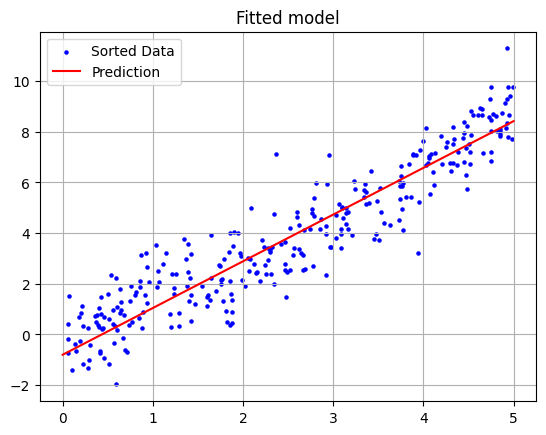

In [82]:
models_fit_and_errors(150,150)